# Training and classification of 3 iris flowers species

## Measurement of the structure of Iris flower, belonging to the species Virginica, Versicolor and Setosa

Importing dataset and making a Pandas Dataframe

In [31]:
import csv
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#temp_tot = {'stem': cols[0], 'stem2': cols[1], 'stem3': cols[2], 'stem4': cols[3], 'stem5': cols[4]}

iris=pd.read_csv("iris.csv")
iris.rename(columns={'5.1': 'Sepal width [cm]', '3.5': 'Sepal length [cm]','1.4': 'Petal width [cm]','0.2': 'Petal length','Iris-setosa': 'Variety name'}, inplace=True)
iris.head()

,Sepal width [cm],Sepal length [cm],Petal width [cm],Petal length,Variety name
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Some clustering to observe if are there patterns

In [50]:
y = iris['a']
x1 = iris['b']
iris['e'] = iris['e'].map({'Iris-setosa': 1, 'Iris-versicolor': 2,'Iris-virginica': 3})
iris_np=pd.DataFrame(iris[['a', 'b', 'c','d','e']]).to_numpy().astype(np.float32)

iris_np[:,1]
    


KeyError: 'a'

In [ ]:
#data processing
clus_C=KMeans(n_clusters=3)
out=clus_C.fit_predict(iris_np[:,0:3])

plt.scatter(y,x1,c=out)
plt.xlabel('size')
plt.ylabel('price')

plt.show()


# Decision trees

In [ ]:
X=iris_np[:, :-1]
Y_truth=iris_np[:,-1] #labels, groud truth
X.shape

In [ ]:
Y_truth

#### get list of possible classes, and check if the sample is balances

In [ ]:
np.unique(Y_truth, return_counts=True)

#### the sample is balanced, even if small

## Create train and test sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_truth,test_size=0.2)
X_train.shape

In [ ]:
X_test.shape

## Train the classifier model

In [51]:
clf=GaussianNB()
clf.fit(X_train,Y_train)
Y_test_predicted=clf.predict(X_test)

In [52]:
Y_test_predicted

array([3., 1., 3., 3., 3., 2., 2., 2., 3., 2., 1., 3., 3., 1., 3., 2., 3.,
       2., 3., 3., 1., 2., 1., 1., 1., 2., 3., 2., 3., 3.], dtype=float32)

In [53]:
Y_test

array([3., 1., 3., 3., 3., 2., 2., 2., 3., 2., 1., 3., 3., 1., 3., 2., 3.,
       2., 3., 3., 1., 2., 1., 1., 1., 2., 3., 2., 3., 3.], dtype=float32)

## Evaluate the model

In [54]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

acc=accuracy_score(Y_test,Y_test_predicted)

In [55]:
acc 

1.0

#### quite good!

In [56]:
#precision, recall and support of each class

p, r, f1, s=precision_recall_fscore_support(Y_test,Y_test_predicted)

for c in range(len(p)):
    print(f"Class: {c}" )
    print(f"Number of items: {s[c]}" )
    print(f"Precision: {p[c]}" )
    print(f"Recall: {r[c]}" )
    print(f"F1_score: {f1[c]}\n \n" )

Class: 0
Number of items: 7
Precision: 1.0
Recall: 1.0
F1_score: 1.0
 

Class: 1
Number of items: 9
Precision: 1.0
Recall: 1.0
F1_score: 1.0
 

Class: 2
Number of items: 14
Precision: 1.0
Recall: 1.0
F1_score: 1.0
 



yes very good:
1) the F1 score is close to 1 

2) the samples are balanced, if they were not, the the accuracy would not be indicative, as it does not give importnace to classes with small support, but this is not the case

### Confusion matrix with seaborn

In [57]:
from sklearn.metrics import confusion_matrix

conf_matrix= confusion_matrix(Y_test,Y_test_predicted)
conf_matrix

array([[ 7,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 14]], dtype=int64)

In [58]:
#make it pandas
#label_names=np.arange(len(p))
conf_matrix_df=pd.DataFrame(conf_matrix)
conf_matrix_df.index.name= 'Real'
conf_matrix_df.columns.name= 'Predicted'

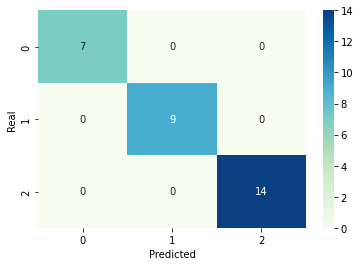

In [59]:
sns.heatmap(conf_matrix_df, annot=True, cmap='GnBu')
plt.show()